Columns: ['home_away', 'home_score', 'away_score', 'event_type', 'player_name', 'substituted_player_name', 'shot_type', 'assist_player', 'rebound_type', 'coordinate_x', 'coordinate_y', 'time_seconds']


,time_elapsed,attempts_at_time,attempts_cumulative
2835,2832.0,0,197
2836,2832.8,0,197
2837,2834.0,0,197
2838,2835.0,0,197
2839,2836.0,0,197
2840,2837.0,0,197
2841,2837.1,1,198
2842,2838.2,0,198
2843,2840.0,0,198
2844,2841.0,0,198


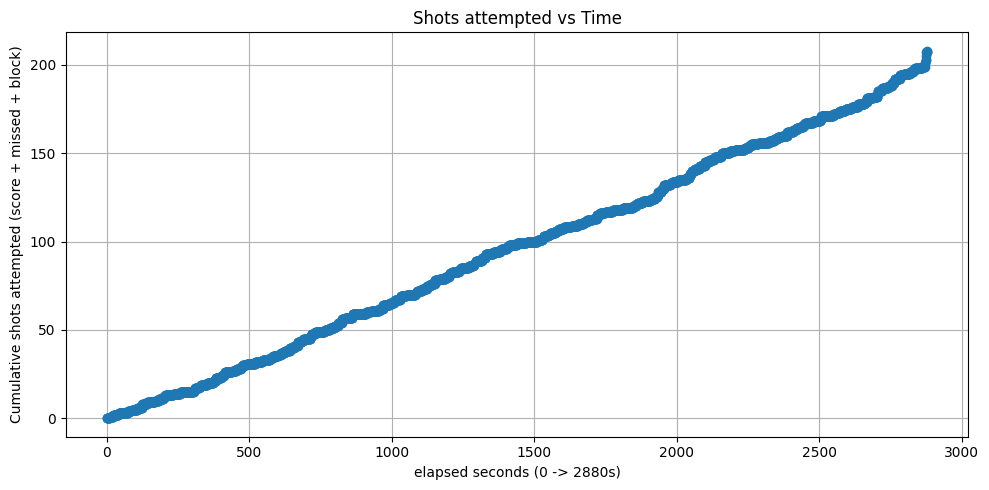

Saved: shots_attempts_vs_time.png


In [5]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

def plot_shots_attempts_from_file(filepath="events.json", cumulative=True,
                                  time_is_seconds_remaining=True, exclude_free_throws=False,
                                  save_path="shots_attempts_vs_time.png"):
    src = Path(filepath)
    if not src.exists():
        raise FileNotFoundError(f"{filepath} not found.")
    with open(src, "r", encoding="utf-8") as f:
        data = json.load(f)
    df = pd.json_normalize(data)
    print("Columns:", df.columns.tolist())

    ev = df["event_type"].astype(str).str.upper()
    df["is_score"]  = (ev == "SCORE").astype(int)
    df["is_missed"] = (ev == "MISSED").astype(int)
    df["is_block"]  = (ev == "BLOCK").astype(int)
    if exclude_free_throws and "shot_type" in df.columns:
        is_ft = df["shot_type"].astype(str).str.upper() == "FREE_THROW"
        df.loc[is_ft & (ev == "SCORE"), "is_score"] = 0
        df.loc[is_ft & (ev == "MISSED"), "is_missed"] = 0

    df["shots_attempted_event"] = df[["is_score","is_missed","is_block"]].sum(axis=1)
    df["time_seconds"] = pd.to_numeric(df["time_seconds"], errors="coerce")

    if time_is_seconds_remaining:
        max_t = df["time_seconds"].max()
        df["time_elapsed"] = (max_t - df["time_seconds"]).astype(float)
        time_col = "time_elapsed"
        xlabel = f"elapsed seconds (0 -> {int(max_t)}s)"
    else:
        df["time_elapsed"] = df["time_seconds"].astype(float)
        time_col = "time_elapsed"
        xlabel = "time (seconds)"

    grouped = df.groupby(time_col, as_index=False)["shots_attempted_event"].sum().sort_values(time_col)
    grouped = grouped.rename(columns={"shots_attempted_event":"attempts_at_time"})
    if cumulative:
        grouped["attempts_cumulative"] = grouped["attempts_at_time"].cumsum()
        y_col = "attempts_cumulative"
        ylabel = "Cumulative shots attempted (score + missed + block)"
    else:
        y_col = "attempts_at_time"
        ylabel = "Shots attempted during that second (score + missed + block)"

    display(grouped.tail(50))

    plt.figure(figsize=(10,5))
    plt.plot(grouped[time_col], grouped[y_col], marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Shots attempted vs Time")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    print("Saved:", save_path)
    return grouped

# Example: set path to your file (e.g., "/mnt/data/events.json")
grouped = plot_shots_attempts_from_file("example-game.json", cumulative=True)


Detected columns: ['time_remaining', 'home_score', 'away_score', 'n_x', 'n_y', 'p_x', 'p_y', 'a', 'b']


,time_remaining,home_score,away_score,n_x,n_y,p_x,p_y,a,b
0,2880.0,0,0,0,0,0.500000,0.500000,0.0,0.0
1,2880.0,0,0,261,0,0.000000,0.500000,0.0,0.0
2,2869.0,0,0,239,0,0.000000,0.500000,0.0,0.0
3,2868.0,0,2,124,124,0.000000,1.000000,0.0,2.0
4,2857.0,2,2,135,68,0.500000,1.000000,2.0,2.0
5,2838.0,2,2,89,45,0.500000,1.000000,2.0,2.0
6,2817.0,2,2,112,37,0.333333,1.000000,2.0,2.0
7,2805.0,2,2,112,37,0.333333,1.000000,2.0,2.0
8,2805.0,2,2,112,37,0.333333,1.000000,2.0,2.0
9,2805.0,2,2,95,63,0.333333,0.500000,2.0,2.0


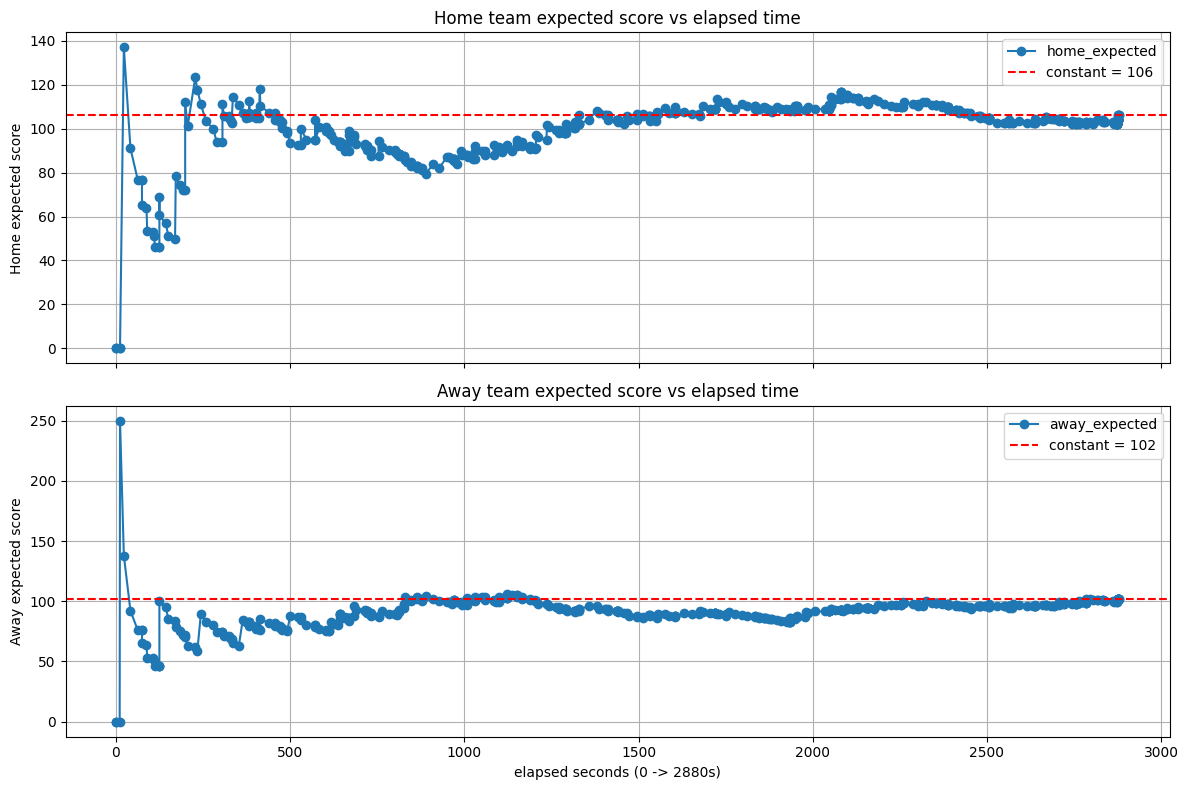

Saved plot to: expected_scores_0.png


,time_remaining,time_elapsed,home_score,n_x,p_x,home_expected,away_score,n_y,p_y,away_expected
0,2880.0,0.0,0,0,0.500000,0.000000,0,0,0.500000,0.0
1,2880.0,0.0,0,261,0.000000,0.000000,0,0,0.500000,0.0
2,2869.0,11.0,0,239,0.000000,0.000000,0,0,0.500000,0.0
3,2868.0,12.0,0,124,0.000000,0.000000,2,124,1.000000,250.0
4,2857.0,23.0,2,135,0.500000,137.000000,2,68,1.000000,138.0
5,2838.0,42.0,2,89,0.500000,91.000000,2,45,1.000000,92.0
6,2817.0,63.0,2,112,0.333333,76.666667,2,37,1.000000,76.0
7,2805.0,75.0,2,112,0.333333,76.666667,2,37,1.000000,76.0
8,2805.0,75.0,2,112,0.333333,76.666667,2,37,1.000000,76.0
9,2805.0,75.0,2,95,0.333333,65.333333,2,63,0.500000,65.0


In [13]:
# Jupyter cell: parse the text file and plot expected home/away scores vs time
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

INPUT_PATH = "output_game_original.txt"   # <- change to your txt filename
OUTPUT_PNG  = "expected_scores_0.png"

def parse_key_value_token(tok):
    """Parse a token like 'home_score:0' or 'n_x=261' -> (key, value_str)"""
    if ':' in tok:
        k, v = tok.split(':', 1)
    elif '=' in tok:
        k, v = tok.split('=', 1)
    else:
        return tok.strip(), None
    return k.strip(), v.strip()

def parse_file_lines(path):
    """
    Parse file where records are formatted as repeated blocks like:
      time_remaining=2869.0
      home_score:0, away_score:0, n_x=261, n_y=0, p_x=0.0, p_y=0.5, ...
    Returns list of dicts (one dict per time block)
    """
    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(f"{path} not found")
    text = p.read_text(encoding="utf-8")
    lines = [ln.strip() for ln in text.splitlines() if ln.strip() != ""]
    
    records = []
    current = None
    for ln in lines:
        # detect time line (starts with time_remaining or time_remaining= or time_remaining:)
        m = re.match(r'^\s*time_remaining\s*[:=]\s*([0-9.+-eE]+)\s*$', ln)
        if m:
            # start new record
            if current is not None:
                records.append(current)
            current = {"time_remaining": float(m.group(1))}
            continue
        # otherwise parse tokens separated by commas
        # protect against lines that may use commas and spaces
        tokens = [t.strip() for t in ln.split(',') if t.strip()!='']
        if current is None:
            # if file begins with a non-time line, skip or create a record only if needed
            current = {}
        for tok in tokens:
            k, v = parse_key_value_token(tok)
            if v is None:
                # token without separator; skip
                continue
            # try numeric conversion, but keep raw as fallback
            v_clean = v
            # remove possible trailing text
            try:
                # integers or floats
                if re.fullmatch(r'[+-]?\d+', v_clean):
                    val = int(v_clean)
                else:
                    val = float(v_clean)
            except Exception:
                # keep string (e.g., "None")
                val = None if v_clean.lower() in ("none","null","na","nan") else v_clean
            current[k] = val
    # append last
    if current is not None:
        records.append(current)
    return records

# ---- parse file ----
records = parse_file_lines(INPUT_PATH)
df = pd.json_normalize(records)

# Show detected columns & first rows
print("Detected columns:", df.columns.tolist())
display(df.head(20))

# ---- ensure numeric columns exist ----
for col in ["n_x", "n_y", "p_x", "p_y", "home_score", "away_score", "time_remaining"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        # If a column is missing create with zeros (prevents crash; but check your file)
        df[col] = pd.Series([0]*len(df))

# Drop rows with missing time_remaining
df = df.dropna(subset=["time_remaining"]).copy()

# compute expected scores
df["home_expected"] = df["a"].fillna(0)*df["n_x"].fillna(0) * df["p_x"].fillna(0) + df["home_score"].fillna(0)
df["away_expected"] = df["b"].fillna(0)*df["n_y"].fillna(0) * df["p_y"].fillna(0) + df["away_score"].fillna(0)

# Convert time_remaining -> elapsed seconds so x increases left->right
max_time = df["time_remaining"].max()
df["time_elapsed"] = (max_time - df["time_remaining"]).astype(float)

# sort by elapsed time
df = df.sort_values("time_elapsed").reset_index(drop=True)

# ---------- plotting ----------
plt.rcParams.update({"figure.autolayout": True})
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Home team plot
axes[0].plot(df["time_elapsed"], df["home_expected"], marker="o", linestyle="-", label="home_expected")
axes[0].axhline(106, color="red", linestyle="--", label="constant = 106")
axes[0].set_ylabel("Home expected score")
axes[0].set_title("Home team expected score vs elapsed time")
axes[0].grid(True)
axes[0].legend()

# Away team plot
axes[1].plot(df["time_elapsed"], df["away_expected"], marker="o", linestyle="-", label="away_expected")
axes[1].axhline(102, color="red", linestyle="--", label="constant = 102")
axes[1].set_xlabel(f"elapsed seconds (0 -> {int(max_time)}s)")
axes[1].set_ylabel("Away expected score")
axes[1].set_title("Away team expected score vs elapsed time")
axes[1].grid(True)
axes[1].legend()

# Save and show
plt.tight_layout()
plt.savefig(OUTPUT_PNG, dpi=150)
plt.show()

print("Saved plot to:", OUTPUT_PNG)

# optional: show last 20 rows of computed expected values
display(df[["time_remaining","time_elapsed","home_score","n_x","p_x","home_expected","away_score","n_y","p_y","away_expected"]].head(20))

df.to_csv("data_convergence.csv", index=False)


Detected columns: ['time_remaining', 'home_score', 'away_score', 'n_x', 'n_y', 'p_x', 'p_y', 'a', 'b']


,time_remaining,home_score,away_score,n_x,n_y,p_x,p_y,a,b
0,2880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2875.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2874.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2858.0,0.0,2.0,0.0,130.0,0.500000,1.0,0.000000,2.0
5,2854.0,0.0,2.0,0.0,110.0,0.500000,1.0,0.000000,2.0
6,2840.0,3.0,2.0,71.0,71.0,1.000000,1.0,3.000000,2.0
7,2819.0,5.0,2.0,92.0,46.0,1.000000,1.0,2.500000,2.0
8,2804.0,8.0,2.0,111.0,37.0,1.000000,1.0,2.666667,2.0
9,2783.0,10.0,2.0,115.0,29.0,1.000000,1.0,2.500000,2.0


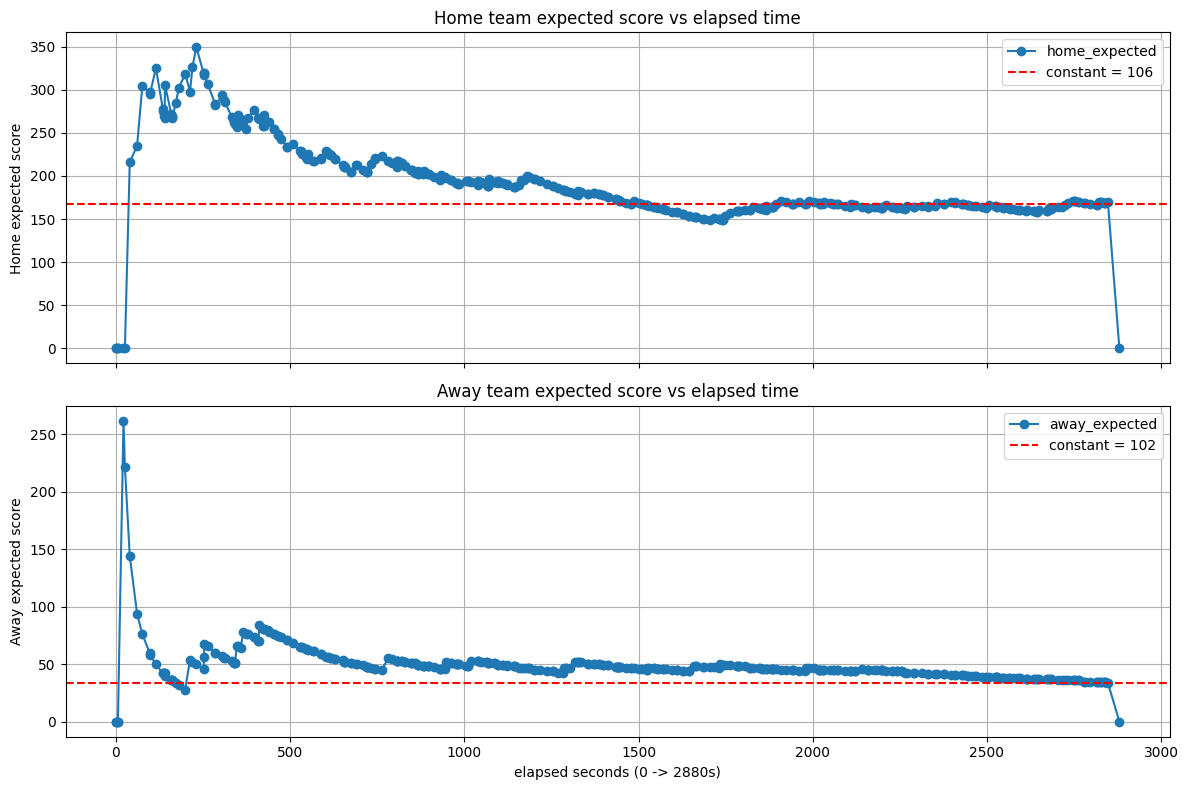

Saved plot to: expected_scores.png


,time_remaining,time_elapsed,home_score,n_x,p_x,home_expected,away_score,n_y,p_y,away_expected
0,2880.0,0.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0
1,2880.0,0.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0
2,2875.0,5.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0
3,2874.0,6.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0
4,2858.0,22.0,0.0,0.0,0.500000,0.000000,2.0,130.0,1.0,262.0
5,2854.0,26.0,0.0,0.0,0.500000,0.000000,2.0,110.0,1.0,222.0
6,2840.0,40.0,3.0,71.0,1.000000,216.000000,2.0,71.0,1.0,144.0
7,2819.0,61.0,5.0,92.0,1.000000,235.000000,2.0,46.0,1.0,94.0
8,2804.0,76.0,8.0,111.0,1.000000,304.000000,2.0,37.0,1.0,76.0
9,2783.0,97.0,10.0,115.0,1.000000,297.500000,2.0,29.0,1.0,60.0


In [15]:
# Jupyter cell: parse the text file and plot expected home/away scores vs time
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

INPUT_PATH = "output_trial.txt"   # <- change to your txt filename
OUTPUT_PNG  = "expected_scores.png"

def parse_key_value_token(tok):
    """Parse a token like 'home_score:0' or 'n_x=261' -> (key, value_str)"""
    if ':' in tok:
        k, v = tok.split(':', 1)
    elif '=' in tok:
        k, v = tok.split('=', 1)
    else:
        return tok.strip(), None
    return k.strip(), v.strip()

def parse_file_lines(path):
    """
    Parse file where records are formatted as repeated blocks like:
      time_remaining=2869.0
      home_score:0, away_score:0, n_x=261, n_y=0, p_x=0.0, p_y=0.5, ...
    Returns list of dicts (one dict per time block)
    """
    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(f"{path} not found")
    text = p.read_text(encoding="utf-8")
    lines = [ln.strip() for ln in text.splitlines() if ln.strip() != ""]
    
    records = []
    current = None
    for ln in lines:
        # detect time line (starts with time_remaining or time_remaining= or time_remaining:)
        m = re.match(r'^\s*time_remaining\s*[:=]\s*([0-9.+-eE]+)\s*$', ln)
        if m:
            # start new record
            if current is not None:
                records.append(current)
            current = {"time_remaining": float(m.group(1))}
            continue
        # otherwise parse tokens separated by commas
        # protect against lines that may use commas and spaces
        tokens = [t.strip() for t in ln.split(',') if t.strip()!='']
        if current is None:
            # if file begins with a non-time line, skip or create a record only if needed
            current = {}
        for tok in tokens:
            k, v = parse_key_value_token(tok)
            if v is None:
                # token without separator; skip
                continue
            # try numeric conversion, but keep raw as fallback
            v_clean = v
            # remove possible trailing text
            try:
                # integers or floats
                if re.fullmatch(r'[+-]?\d+', v_clean):
                    val = int(v_clean)
                else:
                    val = float(v_clean)
            except Exception:
                # keep string (e.g., "None")
                val = None if v_clean.lower() in ("none","null","na","nan") else v_clean
            current[k] = val
    # append last
    if current is not None:
        records.append(current)
    return records

# ---- parse file ----
records = parse_file_lines(INPUT_PATH)
df = pd.json_normalize(records)

# Show detected columns & first rows
print("Detected columns:", df.columns.tolist())
display(df.head(20))

# ---- ensure numeric columns exist ----
for col in ["n_x", "n_y", "p_x", "p_y", "home_score", "away_score", "time_remaining"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        # If a column is missing create with zeros (prevents crash; but check your file)
        df[col] = pd.Series([0]*len(df))

# Drop rows with missing time_remaining
df = df.dropna(subset=["time_remaining"]).copy()

# compute expected scores
df["home_expected"] = df["a"].fillna(0)*df["n_x"].fillna(0) * df["p_x"].fillna(0) + df["home_score"].fillna(0)
df["away_expected"] = df["b"].fillna(0)*df["n_y"].fillna(0) * df["p_y"].fillna(0) + df["away_score"].fillna(0)

# Convert time_remaining -> elapsed seconds so x increases left->right
max_time = df["time_remaining"].max()
df["time_elapsed"] = (max_time - df["time_remaining"]).astype(float)

# sort by elapsed time
df = df.sort_values("time_elapsed").reset_index(drop=True)

# ---------- plotting ----------
plt.rcParams.update({"figure.autolayout": True})
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Home team plot
axes[0].plot(df["time_elapsed"], df["home_expected"], marker="o", linestyle="-", label="home_expected")
axes[0].axhline(168, color="red", linestyle="--", label="constant = 106")
axes[0].set_ylabel("Home expected score")
axes[0].set_title("Home team expected score vs elapsed time")
axes[0].grid(True)
axes[0].legend()

# Away team plot
axes[1].plot(df["time_elapsed"], df["away_expected"], marker="o", linestyle="-", label="away_expected")
axes[1].axhline(34, color="red", linestyle="--", label="constant = 102")
axes[1].set_xlabel(f"elapsed seconds (0 -> {int(max_time)}s)")
axes[1].set_ylabel("Away expected score")
axes[1].set_title("Away team expected score vs elapsed time")
axes[1].grid(True)
axes[1].legend()

# Save and show
plt.tight_layout()
plt.savefig(OUTPUT_PNG, dpi=150)
plt.show()

print("Saved plot to:", OUTPUT_PNG)

# optional: show last 20 rows of computed expected values
display(df[["time_remaining","time_elapsed","home_score","n_x","p_x","home_expected","away_score","n_y","p_y","away_expected"]].head(20))
df.to_csv("data_convergence_2.csv", index=False)

Detected columns: ['home_score', 'away_score', 'n_x', 'n_y', 'p_x', 'p_y', 'a', 'b', 'time_remaining']


,home_score,away_score,n_x,n_y,p_x,p_y,a,b,time_remaining
0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.000000,NaN
1,0.0,0.0,217.0,0.0,0.000000,0.500000,0.0,0.000000,2400.0
2,0.0,0.0,217.0,0.0,0.000000,0.500000,0.0,0.000000,2389.0
3,0.0,0.0,82.0,82.0,0.000000,0.000000,0.0,0.000000,2389.0
4,0.0,0.0,82.0,82.0,0.000000,0.000000,0.0,0.000000,2371.0
5,2.0,0.0,128.0,64.0,0.500000,0.000000,2.0,0.000000,2371.0
6,2.0,3.0,102.0,102.0,0.500000,0.500000,2.0,3.000000,2363.0
7,5.0,3.0,128.0,85.0,0.666667,0.500000,2.5,3.000000,2354.0
8,5.0,3.0,104.0,104.0,0.666667,0.333333,2.5,3.000000,2345.0
9,5.0,3.0,104.0,104.0,0.666667,0.333333,2.5,3.000000,2333.0


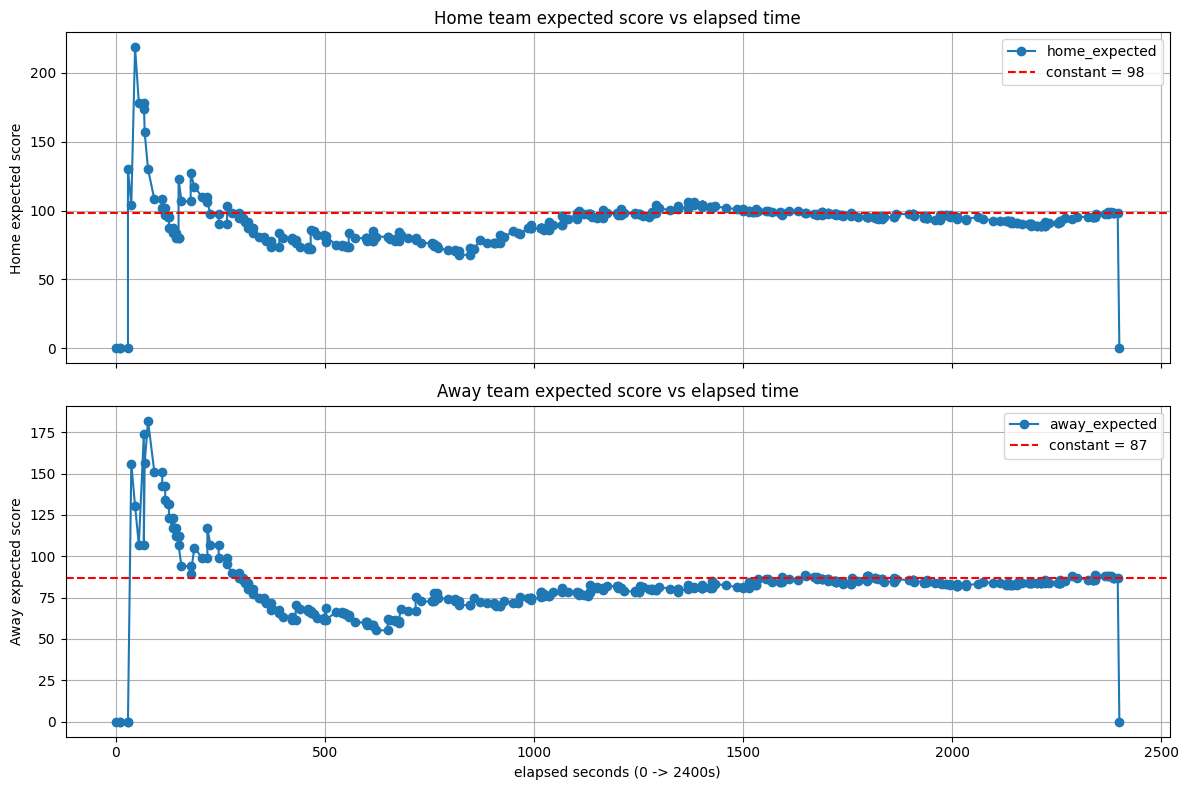

Saved plot to: expected_scores_round1_game1.png


,time_remaining,time_elapsed,home_score,n_x,p_x,home_expected,away_score,n_y,p_y,away_expected
0,2400.0,0.0,0.0,217.0,0.000000,0.000000,0.0,0.0,0.500000,0.000000
1,2389.0,11.0,0.0,217.0,0.000000,0.000000,0.0,0.0,0.500000,0.000000
2,2389.0,11.0,0.0,82.0,0.000000,0.000000,0.0,82.0,0.000000,0.000000
3,2371.0,29.0,0.0,82.0,0.000000,0.000000,0.0,82.0,0.000000,0.000000
4,2371.0,29.0,2.0,128.0,0.500000,130.000000,0.0,64.0,0.000000,0.000000
5,2363.0,37.0,2.0,102.0,0.500000,104.000000,3.0,102.0,0.500000,156.000000
6,2354.0,46.0,5.0,128.0,0.666667,218.333333,3.0,85.0,0.500000,130.500000
7,2345.0,55.0,5.0,104.0,0.666667,178.333333,3.0,104.0,0.333333,107.000000
8,2333.0,67.0,5.0,101.0,0.666667,173.333333,5.0,135.0,0.500000,173.750000
9,2333.0,67.0,5.0,104.0,0.666667,178.333333,3.0,104.0,0.333333,107.000000


In [22]:
# Jupyter cell: parse the text file and plot expected home/away scores vs time
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

INPUT_PATH = "round1_game1.txt"   # <- change to your txt filename
OUTPUT_PNG  = "expected_scores_round1_game1.png"

def parse_key_value_token(tok):
    """Parse a token like 'home_score:0' or 'n_x=261' -> (key, value_str)"""
    if ':' in tok:
        k, v = tok.split(':', 1)
    elif '=' in tok:
        k, v = tok.split('=', 1)
    else:
        return tok.strip(), None
    return k.strip(), v.strip()

def parse_file_lines(path):
    """
    Parse file where records are formatted as repeated blocks like:
      time_remaining=2869.0
      home_score:0, away_score:0, n_x=261, n_y=0, p_x=0.0, p_y=0.5, ...
    Returns list of dicts (one dict per time block)
    """
    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(f"{path} not found")
    text = p.read_text(encoding="utf-8")
    lines = [ln.strip() for ln in text.splitlines() if ln.strip() != ""]
    
    records = []
    current = None
    for ln in lines:
        # detect time line (starts with time_remaining or time_remaining= or time_remaining:)
        m = re.match(r'^\s*time_remaining\s*[:=]\s*([0-9.+-eE]+)\s*$', ln)
        if m:
            # start new record
            if current is not None:
                records.append(current)
            current = {"time_remaining": float(m.group(1))}
            continue
        # otherwise parse tokens separated by commas
        # protect against lines that may use commas and spaces
        tokens = [t.strip() for t in ln.split(',') if t.strip()!='']
        if current is None:
            # if file begins with a non-time line, skip or create a record only if needed
            current = {}
        for tok in tokens:
            k, v = parse_key_value_token(tok)
            if v is None:
                # token without separator; skip
                continue
            # try numeric conversion, but keep raw as fallback
            v_clean = v
            # remove possible trailing text
            try:
                # integers or floats
                if re.fullmatch(r'[+-]?\d+', v_clean):
                    val = int(v_clean)
                else:
                    val = float(v_clean)
            except Exception:
                # keep string (e.g., "None")
                val = None if v_clean.lower() in ("none","null","na","nan") else v_clean
            current[k] = val
    # append last
    if current is not None:
        records.append(current)
    return records

# ---- parse file ----
records = parse_file_lines(INPUT_PATH)
df = pd.json_normalize(records)

# Show detected columns & first rows
print("Detected columns:", df.columns.tolist())
display(df.head(20))

# ---- ensure numeric columns exist ----
for col in ["n_x", "n_y", "p_x", "p_y", "home_score", "away_score", "time_remaining"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        # If a column is missing create with zeros (prevents crash; but check your file)
        df[col] = pd.Series([0]*len(df))

# Drop rows with missing time_remaining
df = df.dropna(subset=["time_remaining"]).copy()

# compute expected scores
df["home_expected"] = df["a"].fillna(0)*df["n_x"].fillna(0) * df["p_x"].fillna(0) + df["home_score"].fillna(0)
df["away_expected"] = df["b"].fillna(0)*df["n_y"].fillna(0) * df["p_y"].fillna(0) + df["away_score"].fillna(0)

# Convert time_remaining -> elapsed seconds so x increases left->right
max_time = df["time_remaining"].max()
df["time_elapsed"] = (max_time - df["time_remaining"]).astype(float)

# sort by elapsed time
df = df.sort_values("time_elapsed").reset_index(drop=True)

# ---------- plotting ----------
plt.rcParams.update({"figure.autolayout": True})
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Home team plot
axes[0].plot(df["time_elapsed"], df["home_expected"], marker="o", linestyle="-", label="home_expected")
axes[0].axhline(98, color="red", linestyle="--", label="constant = 98")
axes[0].set_ylabel("Home expected score")
axes[0].set_title("Home team expected score vs elapsed time")
axes[0].grid(True)
axes[0].legend()

# Away team plot
axes[1].plot(df["time_elapsed"], df["away_expected"], marker="o", linestyle="-", label="away_expected")
axes[1].axhline(87, color="red", linestyle="--", label="constant = 87")
axes[1].set_xlabel(f"elapsed seconds (0 -> {int(max_time)}s)")
axes[1].set_ylabel("Away expected score")
axes[1].set_title("Away team expected score vs elapsed time")
axes[1].grid(True)
axes[1].legend()

# Save and show
plt.tight_layout()
plt.savefig(OUTPUT_PNG, dpi=150)
plt.show()

print("Saved plot to:", OUTPUT_PNG)

# optional: show last 20 rows of computed expected values
display(df[["time_remaining","time_elapsed","home_score","n_x","p_x","home_expected","away_score","n_y","p_y","away_expected"]].head(20))
df.to_csv("data_convergence_2.csv", index=False)

Detected columns: ['home_score', 'away_score', 'n_x', 'n_y', 'p_x', 'p_y', 'a', 'b', 'time_remaining']


,home_score,away_score,n_x,n_y,p_x,p_y,a,b,time_remaining
0,0.0,0.0,0.0,0.0,0.500000,0.5,0.0,0.000000,NaN
1,0.0,0.0,0.0,0.0,0.500000,0.5,0.0,0.000000,2400.0
2,2.0,0.0,119.0,0.0,1.000000,0.5,2.0,0.000000,2392.0
3,2.0,2.0,54.0,54.0,1.000000,1.0,2.0,2.000000,2380.0
4,2.0,2.0,36.0,36.0,1.000000,1.0,2.0,2.000000,2356.0
5,2.0,2.0,36.0,36.0,1.000000,1.0,2.0,2.000000,2336.0
6,2.0,5.0,31.0,62.0,1.000000,1.0,2.0,2.500000,2336.0
7,2.0,5.0,52.0,52.0,0.500000,1.0,2.0,2.500000,2325.0
8,2.0,5.0,52.0,52.0,0.500000,1.0,2.0,2.500000,2311.0
9,2.0,5.0,49.0,49.0,0.500000,1.0,2.0,2.500000,2311.0


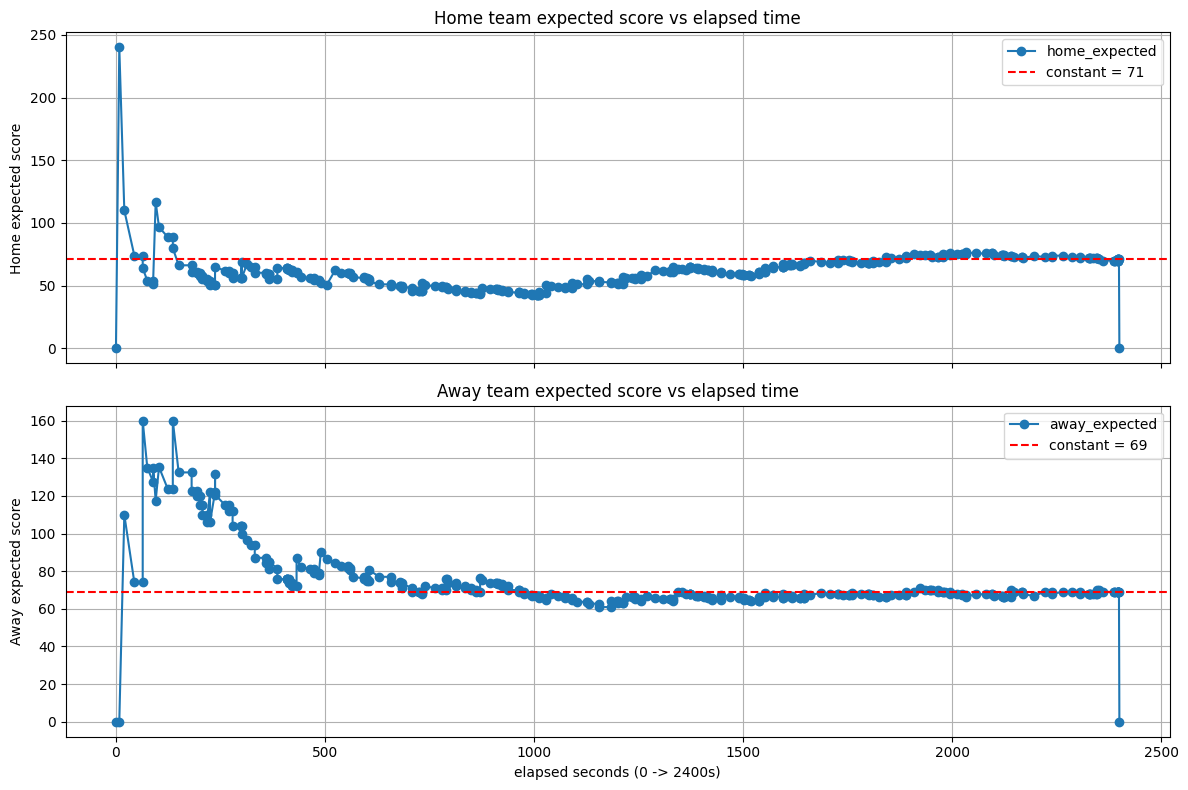

Saved plot to: expected_scores_round1_game2.png


,time_remaining,time_elapsed,home_score,n_x,p_x,home_expected,away_score,n_y,p_y,away_expected
0,2400.0,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.5,0.000000
1,2392.0,8.0,2.0,119.0,1.000000,240.000000,0.0,0.0,0.5,0.000000
2,2380.0,20.0,2.0,54.0,1.000000,110.000000,2.0,54.0,1.0,110.000000
3,2356.0,44.0,2.0,36.0,1.000000,74.000000,2.0,36.0,1.0,74.000000
4,2336.0,64.0,2.0,36.0,1.000000,74.000000,2.0,36.0,1.0,74.000000
5,2336.0,64.0,2.0,31.0,1.000000,64.000000,5.0,62.0,1.0,160.000000
6,2325.0,75.0,2.0,52.0,0.500000,54.000000,5.0,52.0,1.0,135.000000
7,2311.0,89.0,2.0,49.0,0.500000,51.000000,5.0,49.0,1.0,127.500000
8,2311.0,89.0,2.0,52.0,0.500000,54.000000,5.0,52.0,1.0,135.000000
9,2305.0,95.0,5.0,67.0,0.666667,116.666667,5.0,45.0,1.0,117.500000


In [23]:
# Jupyter cell: parse the text file and plot expected home/away scores vs time
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

INPUT_PATH = "round1_game2.txt"   # <- change to your txt filename
OUTPUT_PNG  = "expected_scores_round1_game2.png"

def parse_key_value_token(tok):
    """Parse a token like 'home_score:0' or 'n_x=261' -> (key, value_str)"""
    if ':' in tok:
        k, v = tok.split(':', 1)
    elif '=' in tok:
        k, v = tok.split('=', 1)
    else:
        return tok.strip(), None
    return k.strip(), v.strip()

def parse_file_lines(path):
    """
    Parse file where records are formatted as repeated blocks like:
      time_remaining=2869.0
      home_score:0, away_score:0, n_x=261, n_y=0, p_x=0.0, p_y=0.5, ...
    Returns list of dicts (one dict per time block)
    """
    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(f"{path} not found")
    text = p.read_text(encoding="utf-8")
    lines = [ln.strip() for ln in text.splitlines() if ln.strip() != ""]
    
    records = []
    current = None
    for ln in lines:
        # detect time line (starts with time_remaining or time_remaining= or time_remaining:)
        m = re.match(r'^\s*time_remaining\s*[:=]\s*([0-9.+-eE]+)\s*$', ln)
        if m:
            # start new record
            if current is not None:
                records.append(current)
            current = {"time_remaining": float(m.group(1))}
            continue
        # otherwise parse tokens separated by commas
        # protect against lines that may use commas and spaces
        tokens = [t.strip() for t in ln.split(',') if t.strip()!='']
        if current is None:
            # if file begins with a non-time line, skip or create a record only if needed
            current = {}
        for tok in tokens:
            k, v = parse_key_value_token(tok)
            if v is None:
                # token without separator; skip
                continue
            # try numeric conversion, but keep raw as fallback
            v_clean = v
            # remove possible trailing text
            try:
                # integers or floats
                if re.fullmatch(r'[+-]?\d+', v_clean):
                    val = int(v_clean)
                else:
                    val = float(v_clean)
            except Exception:
                # keep string (e.g., "None")
                val = None if v_clean.lower() in ("none","null","na","nan") else v_clean
            current[k] = val
    # append last
    if current is not None:
        records.append(current)
    return records

# ---- parse file ----
records = parse_file_lines(INPUT_PATH)
df = pd.json_normalize(records)

# Show detected columns & first rows
print("Detected columns:", df.columns.tolist())
display(df.head(20))

# ---- ensure numeric columns exist ----
for col in ["n_x", "n_y", "p_x", "p_y", "home_score", "away_score", "time_remaining"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        # If a column is missing create with zeros (prevents crash; but check your file)
        df[col] = pd.Series([0]*len(df))

# Drop rows with missing time_remaining
df = df.dropna(subset=["time_remaining"]).copy()

# compute expected scores
df["home_expected"] = df["a"].fillna(0)*df["n_x"].fillna(0) * df["p_x"].fillna(0) + df["home_score"].fillna(0)
df["away_expected"] = df["b"].fillna(0)*df["n_y"].fillna(0) * df["p_y"].fillna(0) + df["away_score"].fillna(0)

# Convert time_remaining -> elapsed seconds so x increases left->right
max_time = df["time_remaining"].max()
df["time_elapsed"] = (max_time - df["time_remaining"]).astype(float)

# sort by elapsed time
df = df.sort_values("time_elapsed").reset_index(drop=True)

# ---------- plotting ----------
plt.rcParams.update({"figure.autolayout": True})
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Home team plot
axes[0].plot(df["time_elapsed"], df["home_expected"], marker="o", linestyle="-", label="home_expected")
axes[0].axhline(71, color="red", linestyle="--", label="constant = 71")
axes[0].set_ylabel("Home expected score")
axes[0].set_title("Home team expected score vs elapsed time")
axes[0].grid(True)
axes[0].legend()

# Away team plot
axes[1].plot(df["time_elapsed"], df["away_expected"], marker="o", linestyle="-", label="away_expected")
axes[1].axhline(69, color="red", linestyle="--", label="constant = 69")
axes[1].set_xlabel(f"elapsed seconds (0 -> {int(max_time)}s)")
axes[1].set_ylabel("Away expected score")
axes[1].set_title("Away team expected score vs elapsed time")
axes[1].grid(True)
axes[1].legend()

# Save and show
plt.tight_layout()
plt.savefig(OUTPUT_PNG, dpi=150)
plt.show()

print("Saved plot to:", OUTPUT_PNG)

# optional: show last 20 rows of computed expected values
display(df[["time_remaining","time_elapsed","home_score","n_x","p_x","home_expected","away_score","n_y","p_y","away_expected"]].head(20))
df.to_csv("data_convergence_2.csv", index=False)

Detected columns: ['home_score', 'away_score', 'n_x', 'n_y', 'p_x', 'p_y', 'a', 'b', 'time_remaining']


,home_score,away_score,n_x,n_y,p_x,p_y,a,b,time_remaining
0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,NaN
1,0.0,0.0,0.0,149.0,0.500000,0.000000,0.0,0.0,2400.0
2,0.0,0.0,149.0,149.0,0.000000,0.000000,0.0,0.0,2384.0
3,0.0,0.0,132.0,132.0,0.000000,0.000000,0.0,0.0,2384.0
4,0.0,0.0,79.0,158.0,0.000000,0.000000,0.0,0.0,2382.0
5,0.0,0.0,76.0,153.0,0.000000,0.000000,0.0,0.0,2370.0
6,0.0,0.0,72.0,143.0,0.000000,0.000000,0.0,0.0,2369.0
7,0.0,0.0,92.0,92.0,0.000000,0.000000,0.0,0.0,2367.0
8,0.0,0.0,92.0,138.0,0.000000,0.000000,0.0,0.0,2349.0
9,0.0,0.0,82.0,123.0,0.000000,0.000000,0.0,0.0,2349.0


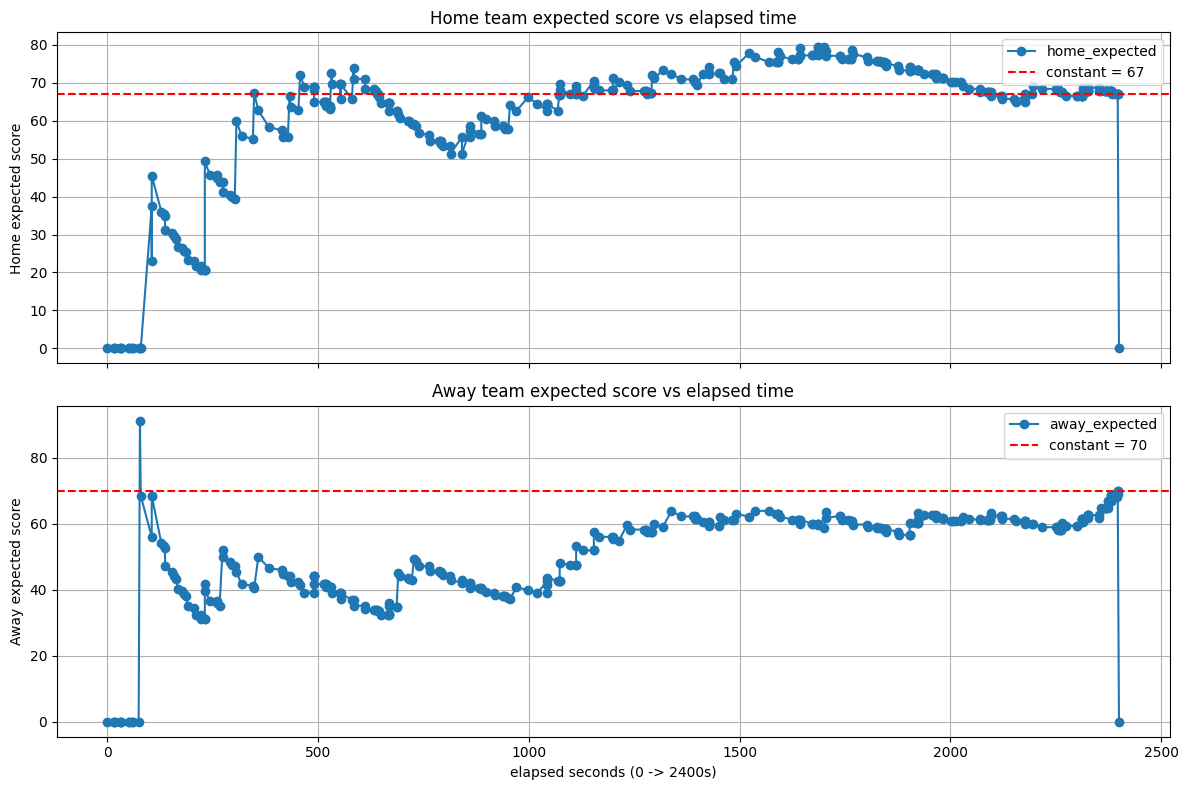

Saved plot to: expected_scores_round1_game3.png


,time_remaining,time_elapsed,home_score,n_x,p_x,home_expected,away_score,n_y,p_y,away_expected
0,2400.0,0.0,0.0,0.0,0.500000,0.0,0.0,149.0,0.000000,0.000000
1,2384.0,16.0,0.0,149.0,0.000000,0.0,0.0,149.0,0.000000,0.000000
2,2384.0,16.0,0.0,132.0,0.000000,0.0,0.0,132.0,0.000000,0.000000
3,2382.0,18.0,0.0,79.0,0.000000,0.0,0.0,158.0,0.000000,0.000000
4,2370.0,30.0,0.0,76.0,0.000000,0.0,0.0,153.0,0.000000,0.000000
5,2369.0,31.0,0.0,72.0,0.000000,0.0,0.0,143.0,0.000000,0.000000
6,2367.0,33.0,0.0,92.0,0.000000,0.0,0.0,92.0,0.000000,0.000000
7,2349.0,51.0,0.0,82.0,0.000000,0.0,0.0,123.0,0.000000,0.000000
8,2349.0,51.0,0.0,92.0,0.000000,0.0,0.0,138.0,0.000000,0.000000
9,2343.0,57.0,0.0,77.0,0.000000,0.0,0.0,115.0,0.000000,0.000000


In [24]:
# Jupyter cell: parse the text file and plot expected home/away scores vs time
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

INPUT_PATH = "round1_game3.txt"   # <- change to your txt filename
OUTPUT_PNG  = "expected_scores_round1_game3.png"

def parse_key_value_token(tok):
    """Parse a token like 'home_score:0' or 'n_x=261' -> (key, value_str)"""
    if ':' in tok:
        k, v = tok.split(':', 1)
    elif '=' in tok:
        k, v = tok.split('=', 1)
    else:
        return tok.strip(), None
    return k.strip(), v.strip()

def parse_file_lines(path):
    """
    Parse file where records are formatted as repeated blocks like:
      time_remaining=2869.0
      home_score:0, away_score:0, n_x=261, n_y=0, p_x=0.0, p_y=0.5, ...
    Returns list of dicts (one dict per time block)
    """
    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(f"{path} not found")
    text = p.read_text(encoding="utf-8")
    lines = [ln.strip() for ln in text.splitlines() if ln.strip() != ""]
    
    records = []
    current = None
    for ln in lines:
        # detect time line (starts with time_remaining or time_remaining= or time_remaining:)
        m = re.match(r'^\s*time_remaining\s*[:=]\s*([0-9.+-eE]+)\s*$', ln)
        if m:
            # start new record
            if current is not None:
                records.append(current)
            current = {"time_remaining": float(m.group(1))}
            continue
        # otherwise parse tokens separated by commas
        # protect against lines that may use commas and spaces
        tokens = [t.strip() for t in ln.split(',') if t.strip()!='']
        if current is None:
            # if file begins with a non-time line, skip or create a record only if needed
            current = {}
        for tok in tokens:
            k, v = parse_key_value_token(tok)
            if v is None:
                # token without separator; skip
                continue
            # try numeric conversion, but keep raw as fallback
            v_clean = v
            # remove possible trailing text
            try:
                # integers or floats
                if re.fullmatch(r'[+-]?\d+', v_clean):
                    val = int(v_clean)
                else:
                    val = float(v_clean)
            except Exception:
                # keep string (e.g., "None")
                val = None if v_clean.lower() in ("none","null","na","nan") else v_clean
            current[k] = val
    # append last
    if current is not None:
        records.append(current)
    return records

# ---- parse file ----
records = parse_file_lines(INPUT_PATH)
df = pd.json_normalize(records)

# Show detected columns & first rows
print("Detected columns:", df.columns.tolist())
display(df.head(20))

# ---- ensure numeric columns exist ----
for col in ["n_x", "n_y", "p_x", "p_y", "home_score", "away_score", "time_remaining"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        # If a column is missing create with zeros (prevents crash; but check your file)
        df[col] = pd.Series([0]*len(df))

# Drop rows with missing time_remaining
df = df.dropna(subset=["time_remaining"]).copy()

# compute expected scores
df["home_expected"] = df["a"].fillna(0)*df["n_x"].fillna(0) * df["p_x"].fillna(0) + df["home_score"].fillna(0)
df["away_expected"] = df["b"].fillna(0)*df["n_y"].fillna(0) * df["p_y"].fillna(0) + df["away_score"].fillna(0)

# Convert time_remaining -> elapsed seconds so x increases left->right
max_time = df["time_remaining"].max()
df["time_elapsed"] = (max_time - df["time_remaining"]).astype(float)

# sort by elapsed time
df = df.sort_values("time_elapsed").reset_index(drop=True)

# ---------- plotting ----------
plt.rcParams.update({"figure.autolayout": True})
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Home team plot
axes[0].plot(df["time_elapsed"], df["home_expected"], marker="o", linestyle="-", label="home_expected")
axes[0].axhline(67, color="red", linestyle="--", label="constant = 67")
axes[0].set_ylabel("Home expected score")
axes[0].set_title("Home team expected score vs elapsed time")
axes[0].grid(True)
axes[0].legend()

# Away team plot
axes[1].plot(df["time_elapsed"], df["away_expected"], marker="o", linestyle="-", label="away_expected")
axes[1].axhline(70, color="red", linestyle="--", label="constant = 70")
axes[1].set_xlabel(f"elapsed seconds (0 -> {int(max_time)}s)")
axes[1].set_ylabel("Away expected score")
axes[1].set_title("Away team expected score vs elapsed time")
axes[1].grid(True)
axes[1].legend()

# Save and show
plt.tight_layout()
plt.savefig(OUTPUT_PNG, dpi=150)
plt.show()

print("Saved plot to:", OUTPUT_PNG)

# optional: show last 20 rows of computed expected values
display(df[["time_remaining","time_elapsed","home_score","n_x","p_x","home_expected","away_score","n_y","p_y","away_expected"]].head(20))
df.to_csv("data_convergence_2.csv", index=False)

Detected columns: ['home_score', 'away_score', 'n_x', 'n_y', 'p_x', 'p_y', 'a', 'b', 'time_remaining']


,home_score,away_score,n_x,n_y,p_x,p_y,a,b,time_remaining
0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,2880.0
2,0.0,0.0,261.0,0.0,0.000000,0.500000,0.0,0.0,2880.0
3,0.0,0.0,239.0,0.0,0.000000,0.500000,0.0,0.0,2869.0
4,0.0,2.0,124.0,124.0,0.000000,1.000000,0.0,2.0,2868.0
5,2.0,2.0,135.0,68.0,0.500000,1.000000,2.0,2.0,2857.0
6,2.0,2.0,89.0,45.0,0.500000,1.000000,2.0,2.0,2838.0
7,2.0,2.0,112.0,37.0,0.333333,1.000000,2.0,2.0,2817.0
8,2.0,2.0,112.0,37.0,0.333333,1.000000,2.0,2.0,2805.0
9,2.0,2.0,112.0,37.0,0.333333,1.000000,2.0,2.0,2805.0


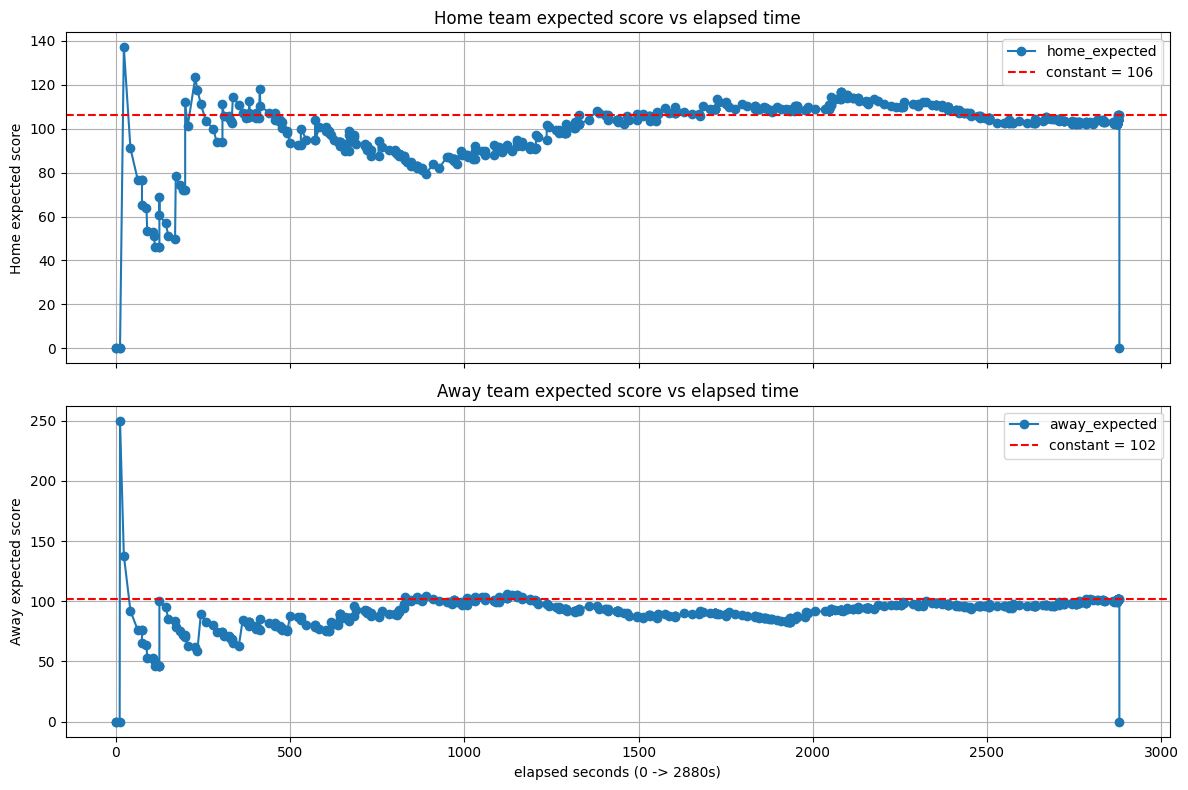

Saved plot to: expected_scores_example-score.png


,time_remaining,time_elapsed,home_score,n_x,p_x,home_expected,away_score,n_y,p_y,away_expected
0,2880.0,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.500000,0.0
1,2880.0,0.0,0.0,261.0,0.000000,0.000000,0.0,0.0,0.500000,0.0
2,2869.0,11.0,0.0,239.0,0.000000,0.000000,0.0,0.0,0.500000,0.0
3,2868.0,12.0,0.0,124.0,0.000000,0.000000,2.0,124.0,1.000000,250.0
4,2857.0,23.0,2.0,135.0,0.500000,137.000000,2.0,68.0,1.000000,138.0
5,2838.0,42.0,2.0,89.0,0.500000,91.000000,2.0,45.0,1.000000,92.0
6,2817.0,63.0,2.0,112.0,0.333333,76.666667,2.0,37.0,1.000000,76.0
7,2805.0,75.0,2.0,112.0,0.333333,76.666667,2.0,37.0,1.000000,76.0
8,2805.0,75.0,2.0,112.0,0.333333,76.666667,2.0,37.0,1.000000,76.0
9,2805.0,75.0,2.0,95.0,0.333333,65.333333,2.0,63.0,0.500000,65.0


In [21]:
# Jupyter cell: parse the text file and plot expected home/away scores vs time
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

INPUT_PATH = "example_game_prediction.txt"   # <- change to your txt filename
OUTPUT_PNG  = "expected_scores_example-score.png"

def parse_key_value_token(tok):
    """Parse a token like 'home_score:0' or 'n_x=261' -> (key, value_str)"""
    if ':' in tok:
        k, v = tok.split(':', 1)
    elif '=' in tok:
        k, v = tok.split('=', 1)
    else:
        return tok.strip(), None
    return k.strip(), v.strip()

def parse_file_lines(path):
    """
    Parse file where records are formatted as repeated blocks like:
      time_remaining=2869.0
      home_score:0, away_score:0, n_x=261, n_y=0, p_x=0.0, p_y=0.5, ...
    Returns list of dicts (one dict per time block)
    """
    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(f"{path} not found")
    text = p.read_text(encoding="utf-8")
    lines = [ln.strip() for ln in text.splitlines() if ln.strip() != ""]
    
    records = []
    current = None
    for ln in lines:
        # detect time line (starts with time_remaining or time_remaining= or time_remaining:)
        m = re.match(r'^\s*time_remaining\s*[:=]\s*([0-9.+-eE]+)\s*$', ln)
        if m:
            # start new record
            if current is not None:
                records.append(current)
            current = {"time_remaining": float(m.group(1))}
            continue
        # otherwise parse tokens separated by commas
        # protect against lines that may use commas and spaces
        tokens = [t.strip() for t in ln.split(',') if t.strip()!='']
        if current is None:
            # if file begins with a non-time line, skip or create a record only if needed
            current = {}
        for tok in tokens:
            k, v = parse_key_value_token(tok)
            if v is None:
                # token without separator; skip
                continue
            # try numeric conversion, but keep raw as fallback
            v_clean = v
            # remove possible trailing text
            try:
                # integers or floats
                if re.fullmatch(r'[+-]?\d+', v_clean):
                    val = int(v_clean)
                else:
                    val = float(v_clean)
            except Exception:
                # keep string (e.g., "None")
                val = None if v_clean.lower() in ("none","null","na","nan") else v_clean
            current[k] = val
    # append last
    if current is not None:
        records.append(current)
    return records

# ---- parse file ----
records = parse_file_lines(INPUT_PATH)
df = pd.json_normalize(records)

# Show detected columns & first rows
print("Detected columns:", df.columns.tolist())
display(df.head(20))

# ---- ensure numeric columns exist ----
for col in ["n_x", "n_y", "p_x", "p_y", "home_score", "away_score", "time_remaining"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        # If a column is missing create with zeros (prevents crash; but check your file)
        df[col] = pd.Series([0]*len(df))

# Drop rows with missing time_remaining
df = df.dropna(subset=["time_remaining"]).copy()

# compute expected scores
df["home_expected"] = df["a"].fillna(0)*df["n_x"].fillna(0) * df["p_x"].fillna(0) + df["home_score"].fillna(0)
df["away_expected"] = df["b"].fillna(0)*df["n_y"].fillna(0) * df["p_y"].fillna(0) + df["away_score"].fillna(0)

# Convert time_remaining -> elapsed seconds so x increases left->right
max_time = df["time_remaining"].max()
df["time_elapsed"] = (max_time - df["time_remaining"]).astype(float)

# sort by elapsed time
df = df.sort_values("time_elapsed").reset_index(drop=True)

# ---------- plotting ----------
plt.rcParams.update({"figure.autolayout": True})
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Home team plot
axes[0].plot(df["time_elapsed"], df["home_expected"], marker="o", linestyle="-", label="home_expected")
axes[0].axhline(106, color="red", linestyle="--", label="constant = 106")
axes[0].set_ylabel("Home expected score")
axes[0].set_title("Home team expected score vs elapsed time")
axes[0].grid(True)
axes[0].legend()

# Away team plot
axes[1].plot(df["time_elapsed"], df["away_expected"], marker="o", linestyle="-", label="away_expected")
axes[1].axhline(102, color="red", linestyle="--", label="constant = 102")
axes[1].set_xlabel(f"elapsed seconds (0 -> {int(max_time)}s)")
axes[1].set_ylabel("Away expected score")
axes[1].set_title("Away team expected score vs elapsed time")
axes[1].grid(True)
axes[1].legend()

# Save and show
plt.tight_layout()
plt.savefig(OUTPUT_PNG, dpi=150)
plt.show()

print("Saved plot to:", OUTPUT_PNG)

# optional: show last 20 rows of computed expected values
display(df[["time_remaining","time_elapsed","home_score","n_x","p_x","home_expected","away_score","n_y","p_y","away_expected"]].head(20))
df.to_csv("data_convergence_2.csv", index=False)